# SimpleRNN

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from rnn import SimpleRNNFromScratch, load_and_preprocess_nusax_sentiment, train_and_evaluate_simplernn_variant
from utils import calculate_f1_macro


## Load & Preprocess Data

In [42]:
MAX_FEATURES = 30000
MAX_LEN = 200
EMBEDDING_DIM = 256
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes, vocab_size, text_vectorizer = load_and_preprocess_nusax_sentiment(max_features=MAX_FEATURES, maxlen=MAX_LEN)
print(f'Train: {x_train.shape}, Val: {x_val.shape}, Test: {x_test.shape}, Classes: {num_classes}, Vocab: {vocab_size}')

Loading NusaX sentiment data for SimpleRNN...
Labels encoded. Classes: ['negative' 'neutral' 'positive'] -> [0, 1, 2]
Vocabulary size: 2836 (max_features was 30000)
x_train shape: (500, 200), y_train shape: (500,)
x_val shape: (100, 200), y_val shape: (100,)
x_test shape: (400, 200), y_test shape: (400,)
Number of classes: 3
Train: (500, 200), Val: (100, 200), Test: (400, 200), Classes: 3, Vocab: 2836
Vocabulary size: 2836 (max_features was 30000)
x_train shape: (500, 200), y_train shape: (500,)
x_val shape: (100, 200), y_val shape: (100,)
x_test shape: (400, 200), y_test shape: (400,)
Number of classes: 3
Train: (500, 200), Val: (100, 200), Test: (400, 200), Classes: 3, Vocab: 2836


In [43]:
results = {}
best_f1 = -1
best_keras_simplernn = None

analysis_epochs = 10

## Testing

### Pengaruh Jumlah Layer RNN


=== 1. Analisis Pengaruh Jumlah Layer RNN ===
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 3s 245ms/step - loss: 1.1261 - accuracy: 0.3520 - val_loss: 1.0807 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 3s 245ms/step - loss: 1.1261 - accuracy: 0.3520 - val_loss: 1.0807 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 2s 201ms/step - loss: 1.1408 - accuracy: 0.4140 - val_loss: 1.1229 - val_accuracy: 0.3900
Epoch 3/10
8/8 [==============================] - 2s 201ms/step - loss: 1.1408 - accuracy: 0.4140 - val_loss: 1.1229 - val_accuracy: 0.3900
Epoch 3/10
8/8 [==============================] - 1s 166ms/step - loss: 1.1702 - accuracy: 0.3840 - val_loss: 1.1165 - val_accuracy: 0.3500
Epoch 4/10
8/8 [==============================] - 1s 166ms/step - loss: 1.1702 - accuracy: 0.3840 - val_loss: 1.1165 - val_accuracy: 0.3500
Epoch 4/10
8/8 [==============================] - 1s 160ms/step - loss: 1.0700 - accuracy: 0.4540 - va

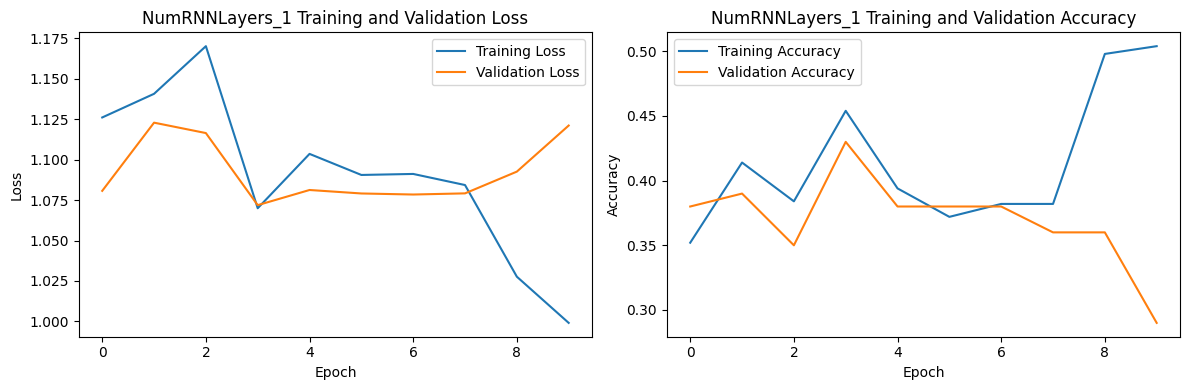

F1-Score for NumRNNLayers_1: 0.3334
Epoch 1/10
8/8 [==============================] - 4s 226ms/step - loss: 1.1344 - accuracy: 0.3600 - val_loss: 1.0876 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 4s 226ms/step - loss: 1.1344 - accuracy: 0.3600 - val_loss: 1.0876 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 1s 182ms/step - loss: 1.0935 - accuracy: 0.4060 - val_loss: 1.0750 - val_accuracy: 0.4400
Epoch 3/10
8/8 [==============================] - 1s 182ms/step - loss: 1.0935 - accuracy: 0.4060 - val_loss: 1.0750 - val_accuracy: 0.4400
Epoch 3/10
8/8 [==============================] - 1s 185ms/step - loss: 1.0073 - accuracy: 0.4840 - val_loss: 1.3026 - val_accuracy: 0.3300
Epoch 4/10
8/8 [==============================] - 1s 185ms/step - loss: 1.0073 - accuracy: 0.4840 - val_loss: 1.3026 - val_accuracy: 0.3300
Epoch 4/10
8/8 [==============================] - 1s 186ms/step - loss: 0.9013 - accuracy: 0.6020 - val_loss: 1.1111 - val_a

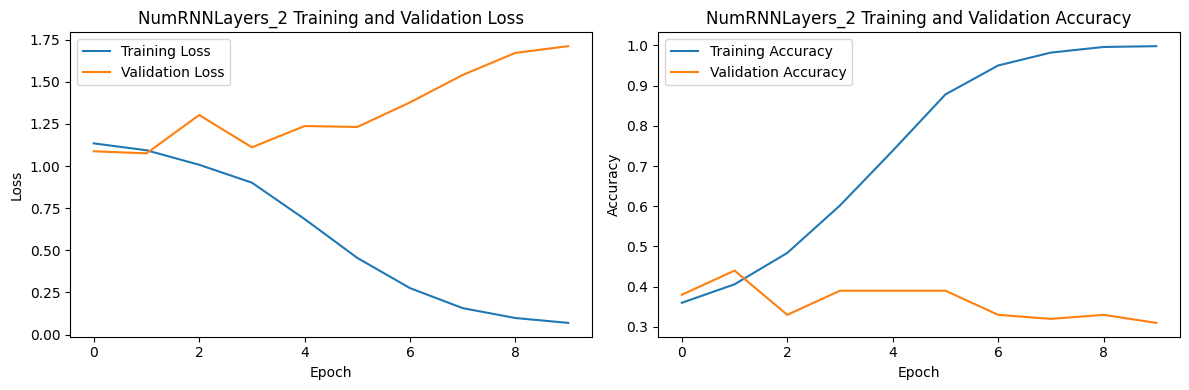

F1-Score for NumRNNLayers_2: 0.3518
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 6s 341ms/step - loss: 1.2172 - accuracy: 0.3260 - val_loss: 1.1037 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 6s 341ms/step - loss: 1.2172 - accuracy: 0.3260 - val_loss: 1.1037 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 2s 288ms/step - loss: 1.1665 - accuracy: 0.3500 - val_loss: 1.0808 - val_accuracy: 0.3800
Epoch 3/10
8/8 [==============================] - 2s 288ms/step - loss: 1.1665 - accuracy: 0.3500 - val_loss: 1.0808 - val_accuracy: 0.3800
Epoch 3/10
8/8 [==============================] - 2s 284ms/step - loss: 1.1599 - accuracy: 0.3620 - val_loss: 1.1029 - val_accuracy: 0.3800
Epoch 4/10
8/8 [==============================] - 2s 284ms/step - loss: 1.1599 - accuracy: 0.3620 - val_loss: 1.1029 - val_accuracy: 0.3800
Epoch 4/10
8/8 [==============================] - 2s 288ms/step - loss: 1.1246 - accuracy: 0.3520 - val_loss: 1.0

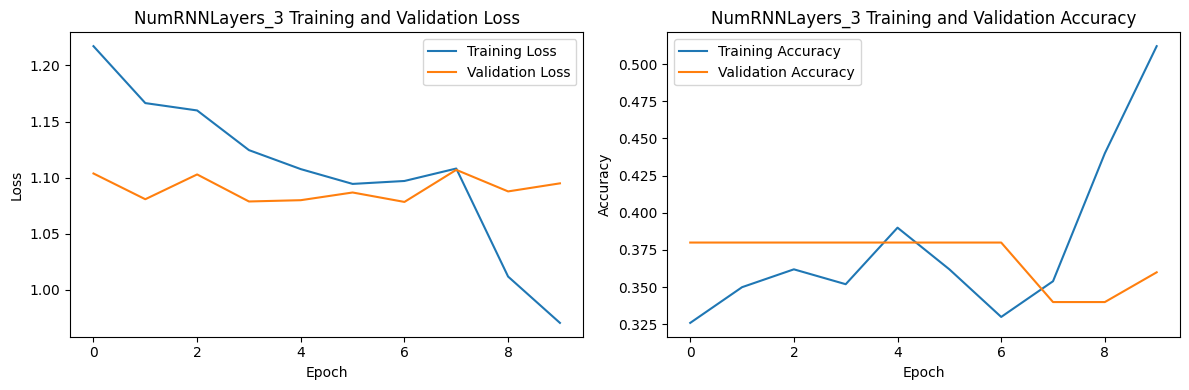

F1-Score for NumRNNLayers_3: 0.3379


In [44]:
print("\n=== 1. Analisis Pengaruh Jumlah Layer RNN ===")

num_rnn_layer_variations = [
    [{'units': 64, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': True},
     {'units': 32, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': True},
     {'units': 32, 'bidirectional': False, 'return_sequences': True},
     {'units': 16, 'bidirectional': False, 'return_sequences': False}]
]


def plot_training_history(history, desc):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


for i, config in enumerate(num_rnn_layer_variations):
    desc = f"NumRNNLayers_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_simplernn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        rnn_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_rnn = keras_model_variant
        best_keras_rnn.save("best_keras_simplernn.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    plot_training_history(history, desc)
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

### Pengaruh banyak cell per layer


=== Analisis Jumlah Cell RNN per Layer ===
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 4s 249ms/step - loss: 1.1085 - accuracy: 0.3740 - val_loss: 1.0862 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 4s 249ms/step - loss: 1.1085 - accuracy: 0.3740 - val_loss: 1.0862 - val_accuracy: 0.3800
Epoch 2/10
8/8 [==============================] - 2s 198ms/step - loss: 1.0927 - accuracy: 0.3660 - val_loss: 1.0872 - val_accuracy: 0.3900
Epoch 3/10
8/8 [==============================] - 2s 198ms/step - loss: 1.0927 - accuracy: 0.3660 - val_loss: 1.0872 - val_accuracy: 0.3900
Epoch 3/10
8/8 [==============================] - 2s 193ms/step - loss: 1.0358 - accuracy: 0.4880 - val_loss: 1.1025 - val_accuracy: 0.4100
Epoch 4/10
8/8 [==============================] - 2s 193ms/step - loss: 1.0358 - accuracy: 0.4880 - val_loss: 1.1025 - val_accuracy: 0.4100
Epoch 4/10
8/8 [==============================] - 2s 189ms/step - loss: 0.8534 - accuracy: 0.6640 - val_l

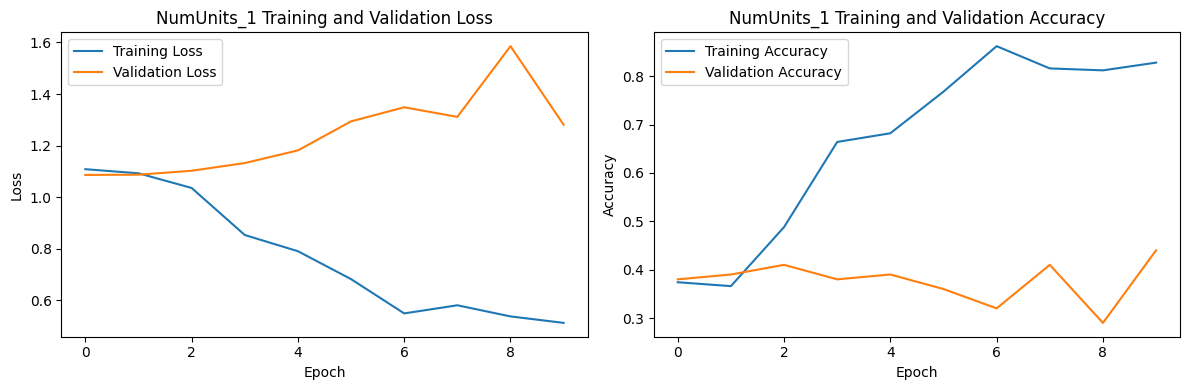

F1-Score for NumUnits_1: 0.3657
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 5s 329ms/step - loss: 1.1049 - accuracy: 0.3380 - val_loss: 1.0831 - val_accuracy: 0.3800
Epoch 2/10
Epoch 2/10
8/8 [==============================] - 2s 261ms/step - loss: 1.0588 - accuracy: 0.4200 - val_loss: 1.1610 - val_accuracy: 0.3000
Epoch 3/10
8/8 [==============================] - 2s 261ms/step - loss: 1.0588 - accuracy: 0.4200 - val_loss: 1.1610 - val_accuracy: 0.3000
Epoch 3/10
8/8 [==============================] - 2s 269ms/step - loss: 1.2891 - accuracy: 0.2820 - val_loss: 1.0782 - val_accuracy: 0.3800
Epoch 4/10
8/8 [==============================] - 2s 269ms/step - loss: 1.2891 - accuracy: 0.2820 - val_loss: 1.0782 - val_accuracy: 0.3800
Epoch 4/10
8/8 [==============================] - 2s 258ms/step - loss: 1.1097 - accuracy: 0.4000 - val_loss: 1.0785 - val_accuracy: 0.3800
Epoch 5/10
8/8 [==============================] - 2s 258ms/step - loss: 1.1097 - accuracy: 0.4000 - val_lo

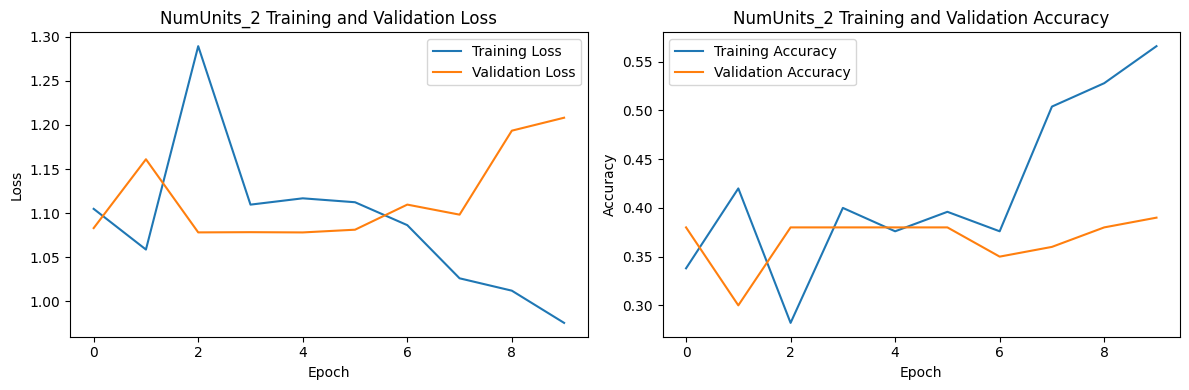

F1-Score for NumUnits_2: 0.3256
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 7s 604ms/step - loss: 1.1549 - accuracy: 0.3140 - val_loss: 1.0898 - val_accuracy: 0.4600
Epoch 2/10
8/8 [==============================] - 7s 604ms/step - loss: 1.1549 - accuracy: 0.3140 - val_loss: 1.0898 - val_accuracy: 0.4600
Epoch 2/10
8/8 [==============================] - 5s 689ms/step - loss: 1.1203 - accuracy: 0.3820 - val_loss: 1.1099 - val_accuracy: 0.4100
Epoch 3/10
8/8 [==============================] - 5s 689ms/step - loss: 1.1203 - accuracy: 0.3820 - val_loss: 1.1099 - val_accuracy: 0.4100
Epoch 3/10
8/8 [==============================] - 6s 699ms/step - loss: 1.1214 - accuracy: 0.3820 - val_loss: 1.1030 - val_accuracy: 0.3300
Epoch 4/10
8/8 [==============================] - 6s 699ms/step - loss: 1.1214 - accuracy: 0.3820 - val_loss: 1.1030 - val_accuracy: 0.3300
Epoch 4/10
8/8 [==============================] - 6s 721ms/step - loss: 1.1415 - accuracy: 0.3620 - val_loss: 1.0834 

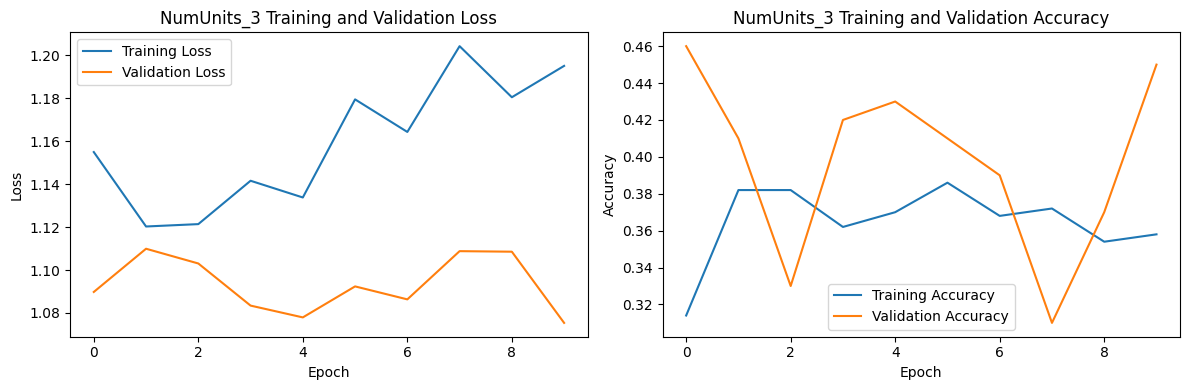

F1-Score for NumUnits_3: 0.2849


In [52]:
rnn_cell_variations = [
    [{'units': 32, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 128, 'bidirectional': False, 'return_sequences': False}],
]

print("\n=== Analisis Jumlah Cell RNN per Layer ===")

for i, config in enumerate(rnn_cell_variations):
    desc = f"NumUnits_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_simplernn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        rnn_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_simplernn = keras_model_variant
        best_keras_simplernn.save("best_keras_simplernn.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    plot_training_history(history, desc)
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

### Pengaruh jenis layer RNN berdasarkan arah


=== Analisis Pengaruh Arah Layer RNN ===
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 6s 295ms/step - loss: 1.2223 - accuracy: 0.3460 - val_loss: 1.0911 - val_accuracy: 0.3600
Epoch 2/10
8/8 [==============================] - 6s 295ms/step - loss: 1.2223 - accuracy: 0.3460 - val_loss: 1.0911 - val_accuracy: 0.3600
Epoch 2/10
8/8 [==============================] - 1s 189ms/step - loss: 1.0057 - accuracy: 0.5000 - val_loss: 1.1903 - val_accuracy: 0.4000
Epoch 3/10
8/8 [==============================] - 1s 189ms/step - loss: 1.0057 - accuracy: 0.5000 - val_loss: 1.1903 - val_accuracy: 0.4000
Epoch 3/10
8/8 [==============================] - 2s 208ms/step - loss: 0.8397 - accuracy: 0.6320 - val_loss: 1.3432 - val_accuracy: 0.3700
Epoch 4/10
8/8 [==============================] - 2s 194ms/step - loss: 0.6773 - accuracy: 0.7200 - val_loss: 1.2297 - val_accuracy: 0.4100
Epoch 5/10
8/8 [==============================] - 2s 208ms/step - loss: 0.8397 - accuracy: 0.6320 - val_los

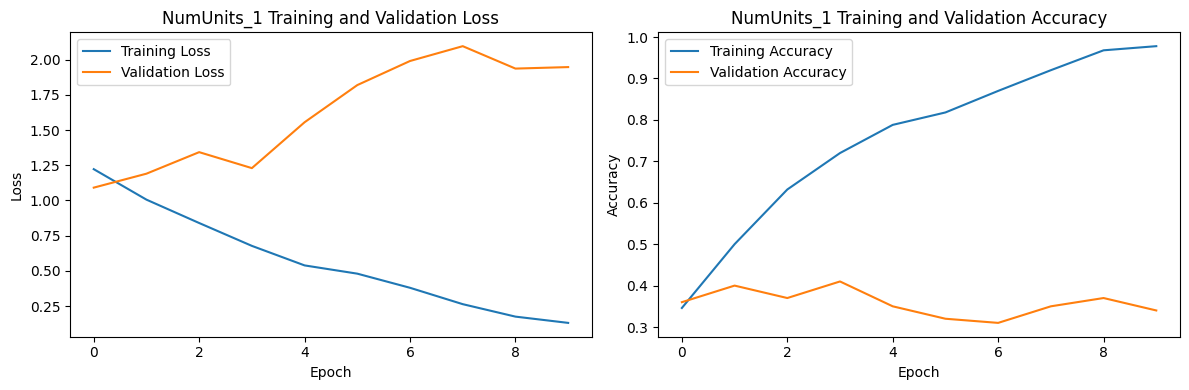

F1-Score for NumUnits_1: 0.3246
Epoch 1/10
Epoch 1/10
8/8 [==============================] - 6s 367ms/step - loss: 1.1801 - accuracy: 0.3920 - val_loss: 1.0459 - val_accuracy: 0.4200
Epoch 2/10
8/8 [==============================] - 6s 367ms/step - loss: 1.1801 - accuracy: 0.3920 - val_loss: 1.0459 - val_accuracy: 0.4200
Epoch 2/10
8/8 [==============================] - 2s 297ms/step - loss: 0.8692 - accuracy: 0.5920 - val_loss: 1.0412 - val_accuracy: 0.5300
Epoch 3/10
8/8 [==============================] - 2s 297ms/step - loss: 0.8692 - accuracy: 0.5920 - val_loss: 1.0412 - val_accuracy: 0.5300
Epoch 3/10
8/8 [==============================] - 2s 293ms/step - loss: 0.5808 - accuracy: 0.8100 - val_loss: 1.0281 - val_accuracy: 0.5200
Epoch 4/10
8/8 [==============================] - 2s 293ms/step - loss: 0.5808 - accuracy: 0.8100 - val_loss: 1.0281 - val_accuracy: 0.5200
Epoch 4/10
8/8 [==============================] - 2s 295ms/step - loss: 0.3566 - accuracy: 0.9300 - val_loss: 1.0343 

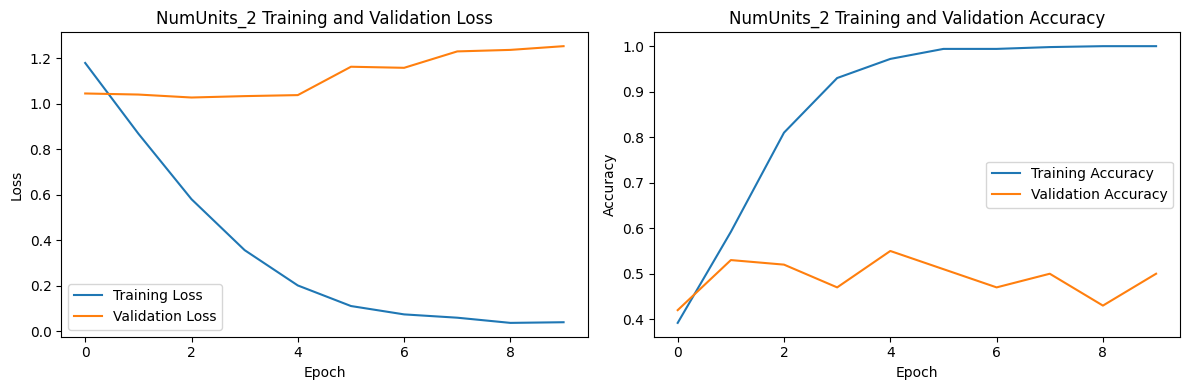

F1-Score for NumUnits_2: 0.4780


In [ ]:
rnn_direction_variations = [
    # Unidirectional
    [{'units': 64, 'bidirectional': False, 'return_sequences': True},
     {'units': 32, 'bidirectional': False, 'return_sequences': False}],

    # Bidirectional
    [{'units': 64, 'bidirectional': True, 'return_sequences': True},
     {'units': 32, 'bidirectional': True, 'return_sequences': False}],
]
l
print("\n=== Analisis Pengaruh Arah Layer RNN ===")

for i, config in enumerate(rnn_direction_variations):
    desc = f"NumUnits_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_simplernn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        rnn_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_simplernn = keras_model_variant
        best_keras_simplernn.save("best_keras_simplernn.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    plot_training_history(history, desc)
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

In [47]:
print("\n--- Ringkasan F1 Scores RNN Variants (Keras Model) ---")
for desc, f1_val in results.items():
    print(f"{desc}: {f1_val:.4f}")

if best_keras_simplernn is not None:
    best_keras_simplernn.save("best_keras_simplernn.keras")
    print("Best Keras SimpleRNN model saved as best_keras_simplernn.keras")
    print("SimpleRNN Experiment Summary\n")
    print("======================\n")
    print("\nNumber of Layers Analysis\n")
    for i in range(1, 4):
        desc = f"NumRNNLayers_{i}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print("\nNumber of Units Analysis\n")
    for i in range(1, 4):
        desc = f"NumUnits_{i}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print("\nDirectionality Analysis\n")
    for dir in ['Uni', 'Bi']:
        desc = f"Direction_{dir}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print(f"\nBest Model: F1-Score = {best_f1:.4f}\n")
else:
    print("No model was trained successfully.")


--- Ringkasan F1 Scores RNN Variants (Keras Model) ---
NumRNNLayers_1: 0.3334
NumRNNLayers_2: 0.3518
NumRNNLayers_3: 0.3379
NumUnits_1: 0.3246
NumUnits_2: 0.4780
NumUnits_3: 0.2958
Best Keras SimpleRNN model saved as best_keras_simplernn.keras
SimpleRNN Experiment Summary



Number of Layers Analysis

NumRNNLayers_1: F1 = 0.3334

NumRNNLayers_2: F1 = 0.3518

NumRNNLayers_3: F1 = 0.3379


Number of Units Analysis

NumUnits_1: F1 = 0.3246

NumUnits_2: F1 = 0.4780

NumUnits_3: F1 = 0.2958


Directionality Analysis


Best Model: F1-Score = 0.4780



In [48]:
if best_keras_simplernn is not None:
    rnn_manual = SimpleRNNFromScratch()
    rnn_manual.build_from_keras(best_keras_simplernn)
    print("Manual Simple RNN initialized with best Keras model weights.")
else:
    print("No best Keras model available to load into manual Simple RNN.")

Manual Simple RNN initialized with best Keras model weights.



Predicting with Keras Simple RNN on 400 samples...
Predicting with Manual Simple RNN on 400 samples...
Predicting with Manual Simple RNN on 400 samples...
Keras SimpleRNN output shape: (400, 3)
Manual SimpleRNN output shape: (400, 3)

Macro F1-Score (Keras SimpleRNN): 0.3727
Macro F1-Score (Manual SimpleRNN): 0.3727
Absolute Difference: 0.000133
Keras SimpleRNN output shape: (400, 3)
Manual SimpleRNN output shape: (400, 3)

Macro F1-Score (Keras SimpleRNN): 0.3727
Macro F1-Score (Manual SimpleRNN): 0.3727
Absolute Difference: 0.000133


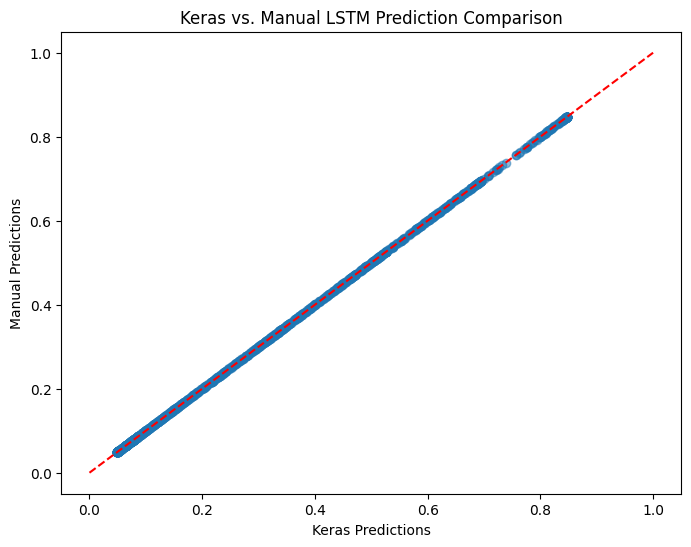

In [ ]:
if best_keras_simplernn is not None:
    x_test_sample = x_test
    y_test_sample = y_test
    
    print(f"\nPredicting with Keras Simple RNN on {x_test_sample.shape[0]} samples...")
    y_pred_keras_rnn_proba = best_keras_simplernn.predict(x_test_sample, verbose=0)
    
    print(f"Predicting with Manual Simple RNN on {x_test_sample.shape[0]} samples...")
    y_pred_manual_rnn_proba = rnn_manual.predict(x_test_sample)
    
    print(f"Keras SimpleRNN output shape: {y_pred_keras_rnn_proba.shape}")
    print(f"Manual SimpleRNN output shape: {y_pred_manual_rnn_proba.shape}")
    
    f1_keras_rnn = calculate_f1_macro(y_test_sample, y_pred_keras_rnn_proba, num_classes)
    f1_manual_rnn = calculate_f1_macro(y_test_sample, y_pred_manual_rnn_proba, num_classes)
    
    abs_diff = np.sum(np.abs(y_pred_keras_rnn_proba - y_pred_manual_rnn_proba))
    print(f"\nMacro F1-Score (Keras SimpleRNN): {f1_keras_rnn:.4f}")
    print(f"Macro F1-Score (Manual SimpleRNN): {f1_manual_rnn:.4f}")
    print(f"Absolute Difference: {abs_diff:.6f}")
    assert abs_diff < 1e-3, 'Manual forward pass differs significantly from Keras!'
    
    # Save prediction comparison plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_keras_rnn_proba.flatten(), y_pred_manual_rnn_proba.flatten(), alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Keras Predictions')
    plt.ylabel('Manual Predictions')
    plt.title('Keras vs. Manual SimpleRNN Prediction Comparison')
    plt.show()
else:
    print("Cannot perform prediction comparison due to missing best model.")

## 6. Interpretasi Hasil Eksperimen
- SimpleRNN cenderung kurang efektif untuk data teks panjang dan kompleks seperti NusaX-Sentiment, sehingga F1-score umumnya lebih rendah dari LSTM.
- Penambahan layer/unit atau bidirectional dapat membantu, namun tetap terbatas dibanding LSTM.
- Hasil manual forward propagation harus sangat mirip dengan Keras jika implementasi benar.